<a id='top'> </a>
Author: [James Bourbeau](http://www.jamesbourbeau.com)

In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,scipy,pandas,sklearn,mlxtend

last updated: 2017-02-08 

CPython 2.7.10
IPython 5.2.2

numpy 1.12.0
scipy 0.18.1
pandas 0.19.2
sklearn 0.18
mlxtend 0.5.0


# Data-MC comparisons
### Table of contents
1. [Data preprocessing](#Data-preprocessing)
2. [Comparison of different sequential feature selections](#Comparison-of-different-sequential-feature-selections)
3. [Serialize feature selection algorithm](#Serialize-feature-selection-algorithm)

In [2]:
import sys
sys.path.append('/home/jbourbeau/cr-composition')
print('Added to PYTHONPATH')

Added to PYTHONPATH


In [3]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from icecube.weighting.weighting import from_simprod

import composition as comp
import composition.analysis.plotting as plotting

# # Plotting-related
# sns.set_palette('muted')
# sns.set_color_codes()
# color_dict = {}
# for i, composition in enumerate(['light', 'heavy', 'total']):
#     color_dict[composition] = sns.color_palette('muted').as_hex()[i]
%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data preprocessing
[ [back to top](#top) ]
1. Load simulation/data dataframe and apply specified quality cuts
2. Extract desired features from dataframe
3. Get separate testing and training datasets
4. Feature selection

### Load simulation, format feature and target matrices

In [4]:
df_sim = comp.load_dataframe(datatype='sim', config='IC79')
df_data = comp.load_dataframe(datatype='data', config='IC79')

n_sim = len(df_sim)
n_data = len(df_data)
print('{} simulation events'.format(n_sim))
print('{} data events'.format(n_data))

KeyError: 'mil_rlogl'

/home/jbourbeau/cr-composition/composition/analysis/data_functions.py:11: RuntimeWarning: invalid value encountered in true_divide
  ratio_err = ratio * np.sqrt((num_err / num)**2 + (den_err / den)**2)
/home/jbourbeau/cr-composition/composition/analysis/data_functions.py:10: RuntimeWarning: divide by zero encountered in true_divide
  ratio = num/den
/home/jbourbeau/cr-composition/composition/analysis/data_functions.py:10: RuntimeWarning: invalid value encountered in true_divide
  ratio = num/den
/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


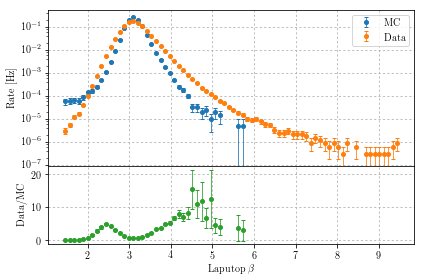

In [5]:
beta_bins=np.linspace(1.4, 9.5, 75)
plotting.make_verification_plot(df_data, df_sim, 'lap_beta', beta_bins, 'Laputop \\beta')

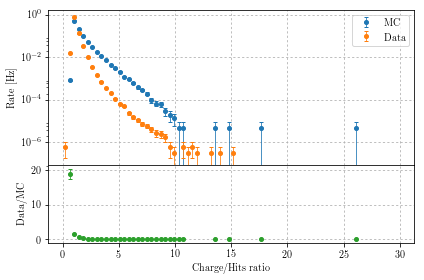

In [10]:
charge_hits_bins=np.linspace(0, 30, 75)
plotting.make_verification_plot(df_data, df_sim, 'charge_nhits_ratio', charge_hits_bins, 'Charge/Hits ratio')

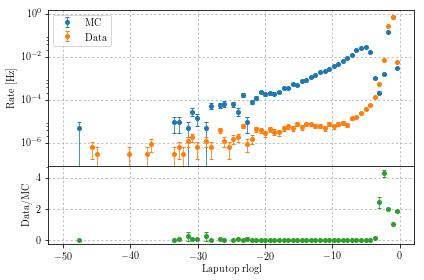

In [11]:
rlogl_bins=np.linspace(-50, 0, 75)
plotting.make_verification_plot(df_data, df_sim, 'lap_rlogl', rlogl_bins, 'Laputop rlogl')

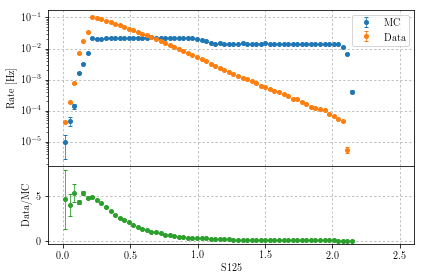

In [14]:
s125_bins=np.linspace(0, 2.5, 75)
plotting.make_verification_plot(df_data, df_sim, 'log_s125', s125_bins, 'S125')

In [12]:
df_sim['log_s125'].min(), df_sim['log_s125'].max()

(0.026478313225486924, 2.1315707028243409)

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(beta_midpoints, rate_sim, yerr=rate_sim_err, label='MC', marker='.', ms=8)
ax.errorbar(beta_midpoints, rate_data, yerr=rate_data_err, label='Data', marker='.', ms=8)
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('Laputop $\\beta$')
ax.set_ylabel('Frequency')
plt.grid()
plt.legend()
plt.show()

/home/jbourbeau/cr-composition/composition/analysis/data_functions.py:10: RuntimeWarning: divide by zero encountered in true_divide
  ratio = num/den
/home/jbourbeau/cr-composition/composition/analysis/data_functions.py:10: RuntimeWarning: invalid value encountered in true_divide
  ratio = num/den


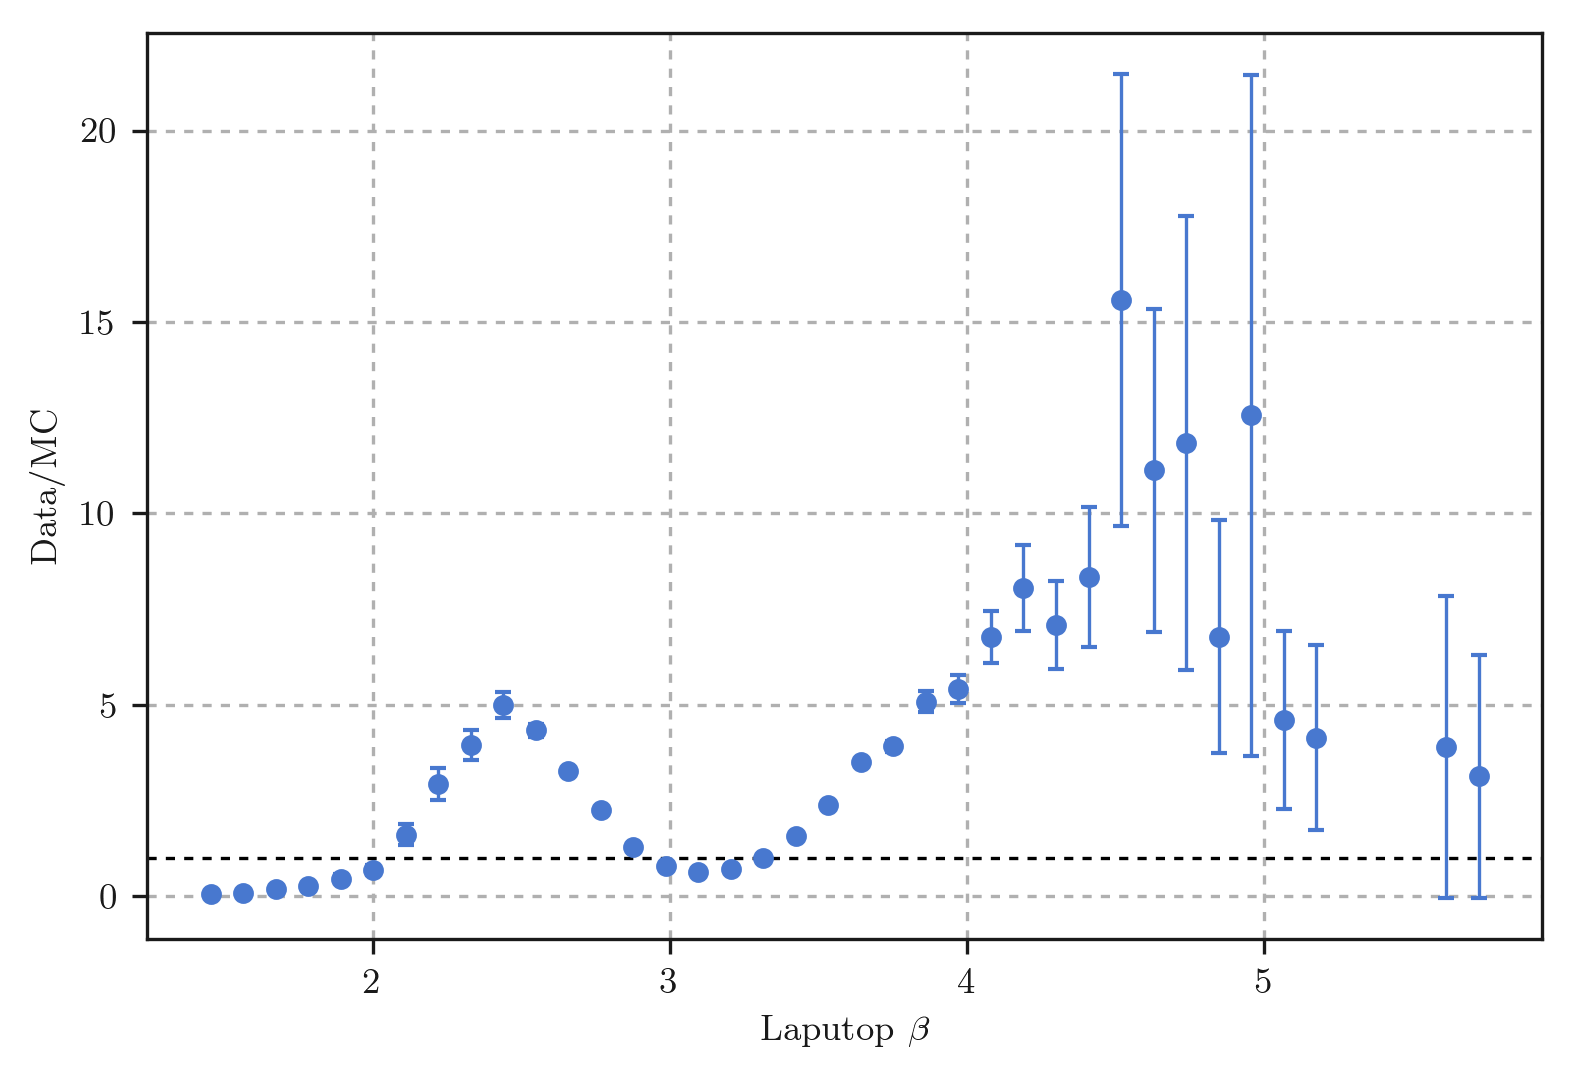

In [7]:
fig, ax = plt.subplots()
ratio, ratio_err = comp.ratio_error(rate_data, rate_data_err,
                                    rate_sim, rate_sim_err)
ax.errorbar(beta_midpoints, ratio, yerr=ratio_err, marker='.', ms=8)
ax.axhline(1.0, marker='None', ls=':')
ax.set_xlabel('Laputop $\\beta$')
ax.set_ylabel('Data/MC')
plt.grid()
plt.show()